In [8]:
#train_test_split

import pandas as pd
data=pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
print(data.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [12]:
input_data=data.iloc[:,:-1]
output_data=data['Net Sales Value']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=(0.25))


In [20]:
x_train.shape,y_train.shape

((337, 12), (337,))

In [22]:
x_test.shape,y_test.shape

((113, 12), (113,))

In [ ]:
'''he train_test_split function from the sklearn.model_selection module is used to split a dataset into training and testing subsets. This ensures that a model can be trained on one portion of the data (the training set) and evaluated on another portion (the testing set). It’s essential for evaluating the generalizability of machine learning models and avoiding overfitting.

Why Use train_test_split?
Training set: Used to train the model.
Testing set: Used to evaluate the model on unseen data.
Ensures that the model does not overfit to the training data.
Prevents data leakage: The test data is kept separate to simulate unseen, real-world data.'''

In [ ]:
#Regression analysis

1> simple linear regression 


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [257]:
q1=data['EstimatedSalary'].quantile(0.25)
q3=data['EstimatedSalary'].quantile(0.75)
iqr=q3-q1
iqr

45000.0

In [259]:
min_r=q1-1.5*iqr
max_r=q3+1.5*iqr
min_r,max_r

(-24500.0, 155500.0)

In [261]:
data[data['EstimatedSalary']<=max_r]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [263]:
data[['Age','EstimatedSalary']].isnull().sum()

Age                0
EstimatedSalary    0
dtype: int64

In [265]:
x=data[['Age']]
y=data['EstimatedSalary']

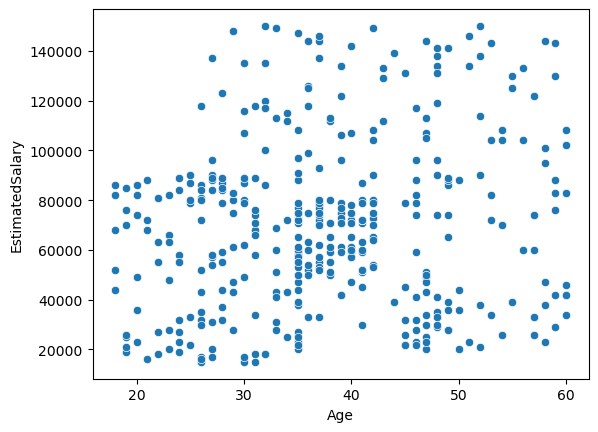

In [268]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=data)
plt.show()

In [270]:
from sklearn.model_selection import train_test_split

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [238]:
from sklearn.linear_model import LinearRegression

In [240]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [242]:
#  y = m * x + c  formula 

In [244]:
lr.score(x_test,y_test)*100

3.4831056401748994

In [246]:
lr.predict([[19]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61232.73576663])

In [248]:
lr.coef_     # m is the coef

array([479.47086516])

In [250]:
lr.intercept_   # c is the intercept

52122.789328661434

In [252]:
y_pred=lr.predict(x)

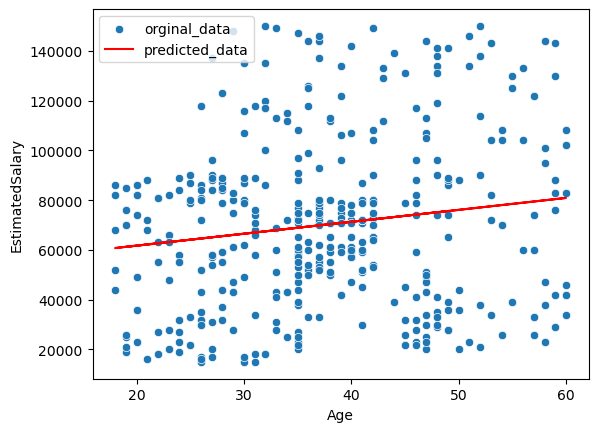

In [254]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=data)
plt.plot(data['Age'],y_pred,c='red')
plt.legend(['orginal_data','predicted_data'])
plt.show()

Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


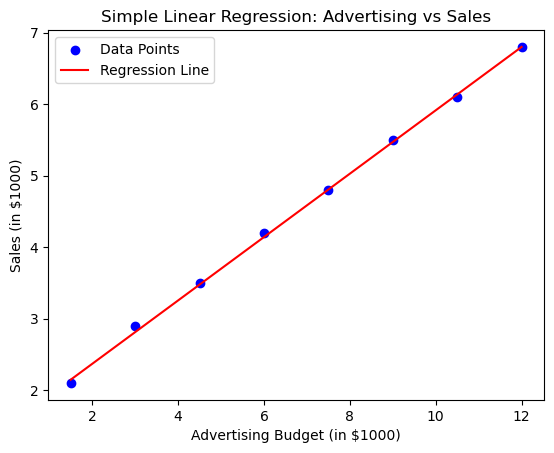

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset: Advertising budget vs Sales
data = {
    'Advertising Budget (in $1000)': [1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0],
    'Sales (in $1000)': [2.1, 2.9, 3.5, 4.2, 4.8, 5.5, 6.1, 6.8]
}
df = pd.DataFrame(data)

# Define the feature (X) and target (y)
X = df[['Advertising Budget (in $1000)']]  # 2D array for scikit-learn
y = df['Sales (in $1000)']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plotting the regression line and data points
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Advertising Budget (in $1000)')
plt.ylabel('Sales (in $1000)')
plt.legend()
plt.title('Simple Linear Regression: Advertising vs Sales')
plt.show()


In [ ]:

# multiple Linear Regression 


In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


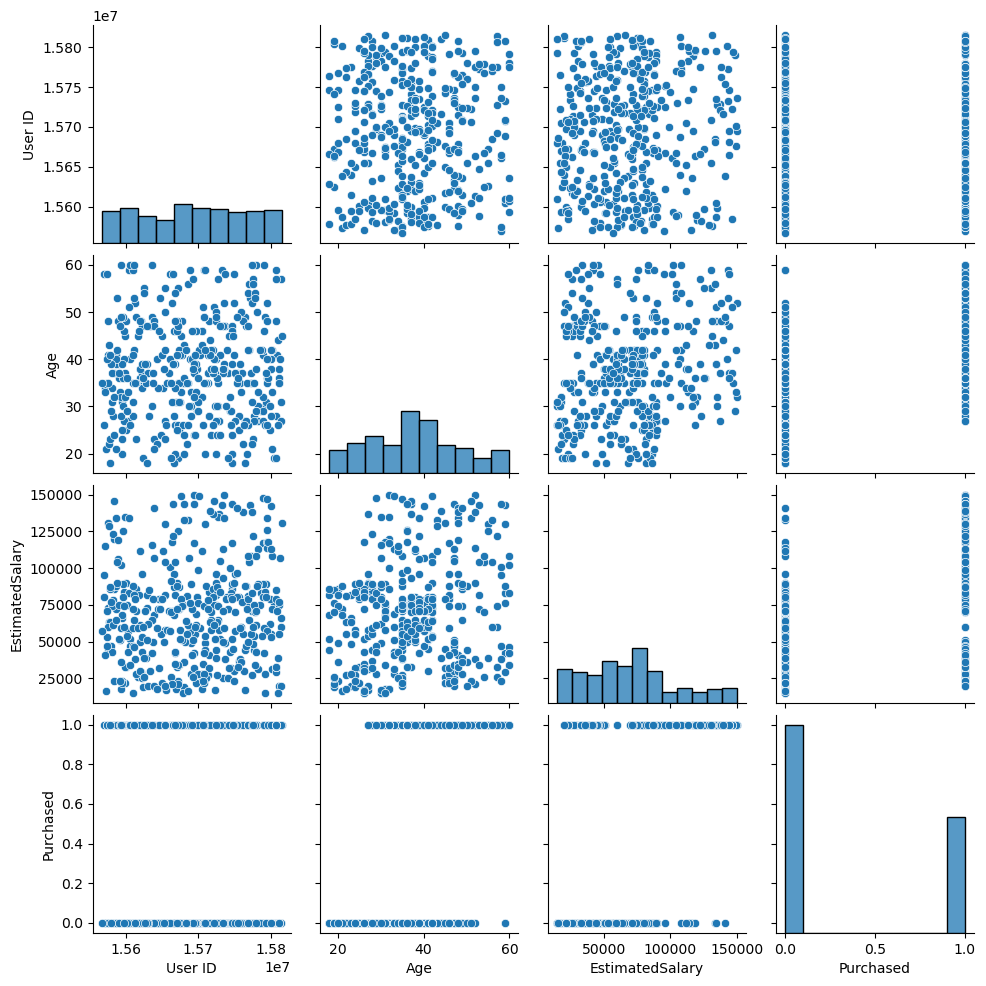

In [306]:
sns.pairplot(data=data)
plt.show()

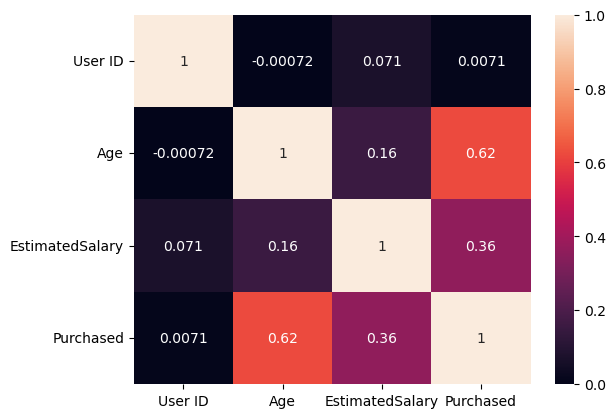

In [307]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [310]:
x=data.iloc[:,:-1]
y=data['EstimatedSalary']

In [312]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [314]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#  formula    y_pred=m1x1+m2x2+c

In [318]:
lr.score(x_test,y_test)*100

100.0

In [320]:
lr.coef_

array([-1.22648828e-17, -1.02939879e-12,  1.00000000e+00])

In [322]:
lr.intercept_

2.1827872842550278e-10

In [326]:
lr.predict(x_test)

array([ 22000.,  88000.,  44000.,  96000.,  28000.,  62000., 107000.,
        83000.,  75000.,  65000.,  65000.,  34000.,  48000.,  23000.,
        87000., 108000.,  38000.,  74000.,  42000.,  60000.,  27000.,
        80000.,  23000.,  76000.,  19000.,  23000.,  80000.,  53000.,
       125000.,  21000.,  41000.,  70000., 144000.,  79000., 107000.,
        75000.,  55000.,  65000.,  30000.,  68000.,  33000.,  55000.,
        52000.,  20000.,  49000., 139000.,  61000.,  71000.,  41000.,
        43000.,  79000.,  82000.,  55000.,  80000.,  80000.,  31000.,
       102000., 118000.,  74000.,  76000.,  51000.,  57000.,  90000.,
        87000.,  59000., 137000.,  90000., 144000.,  59000., 113000.,
       138000.,  85000.,  58000.,  20000.,  34000.,  50000., 133000.,
        26000.,  47000.,  78000.])

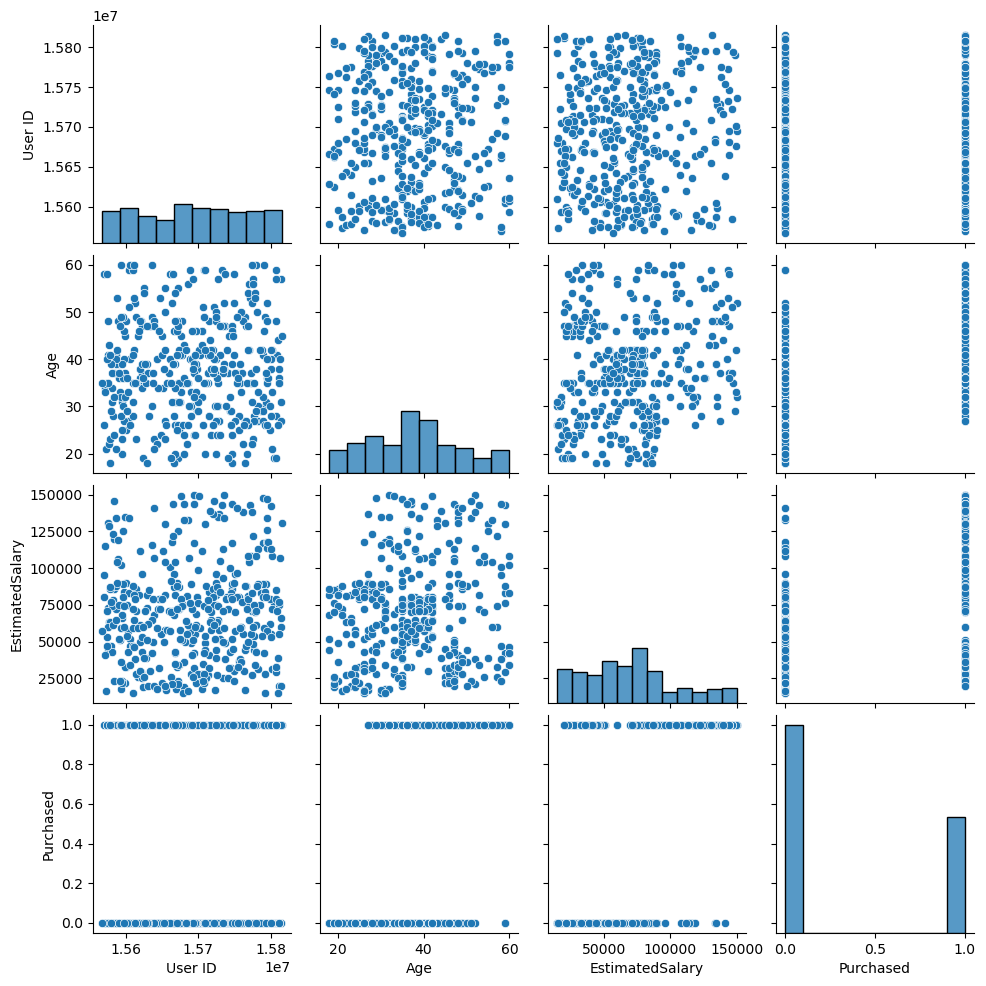

In [328]:
sns.pairplot(data=data)
plt.show()

In [ ]:
#polynomoal  linear regression 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


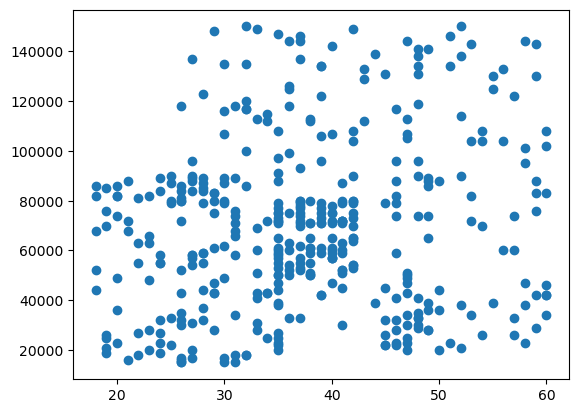

In [5]:
plt.scatter(data['Age'],data['EstimatedSalary'])
plt.show()

In [32]:
x=data[['Age']]
y=data['EstimatedSalary']

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf=PolynomialFeatures(degree=2)
pf.fit(x)
x=pf.transform(x)
x

array([[1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 2.600e+01, 6.760e+02],
       ...,
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 4.900e+01, 2.401e+03]])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.score(x_test,y_test)*100

4.1630994479584515

In [12]:
pred=lr.predict(x)
pred

array([55035.2752727 , 70712.1988407 , 63187.21844161, 64187.55456315,
       55035.2752727 , 64187.55456315, 64187.55456315, 68573.38321469,
       62145.825523  , 70712.1988407 , 63187.21844161, 63187.21844161,
       56323.00897378, 68573.38321469, 53706.48477455, 66065.056415  ,
       75572.34960786, 75172.89245076, 75393.14942785, 75710.49299079,
       75172.89245076, 75572.34960786, 75710.49299079, 75172.89245076,
       75393.14942785, 75572.34960786, 75807.57957665, 75572.34960786,
       66065.056415  , 67778.33107854, 67778.33107854, 64187.55456315,
       57569.68587777, 65146.83388761, 64187.55456315, 70712.1988407 ,
       69327.37855377, 66942.22214531, 63187.21844161, 64187.55456315,
       64187.55456315, 69327.37855377, 70712.1988407 , 66942.22214531,
       65146.83388761, 59939.86929454, 62145.825523  , 64187.55456315,
       66942.22214531, 67778.33107854, 61063.37580731, 53706.48477455,
       66065.056415  , 70712.1988407 , 64187.55456315, 61063.37580731,
      

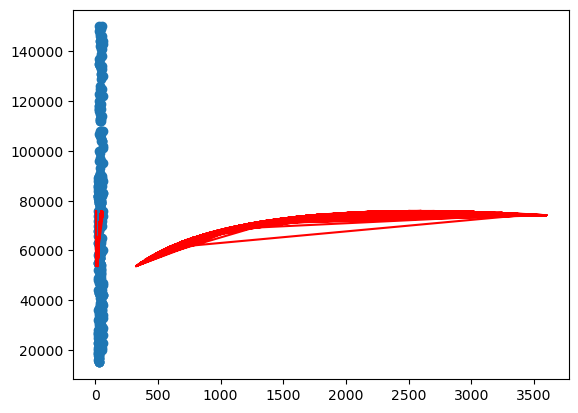

In [16]:
plt.plot(x,pred,c='red')
plt.scatter(data['Age'],data['EstimatedSalary'])
plt.show()


 regulization =ridge,lasso
 cost function = mse,mae,rmse


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [127]:
data.drop(columns=['Gender'],inplace=True)

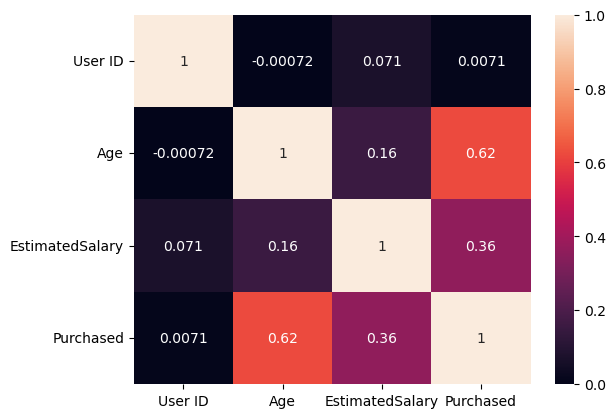

In [130]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [132]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [134]:
from sklearn.preprocessing import StandardScaler

In [136]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)
x

,User ID,Age,EstimatedSalary
0,-0.936579,-1.781797,-1.490046
1,1.668387,-0.253587,-1.460681
2,-0.320877,-1.113206,-0.785290
3,-1.233692,-1.017692,-0.374182
4,1.571389,-1.781797,0.183751
...,...,...,...
395,0.004517,0.797057,-0.844019
396,0.203039,1.274623,-1.372587
397,-0.520392,1.179110,-1.460681
398,0.886955,-0.158074,-1.078938


In [164]:
#Train test split

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:

#Linear Regression


In [170]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
lr.coef_

array([0.0016479 , 0.2671329 , 0.14392971])

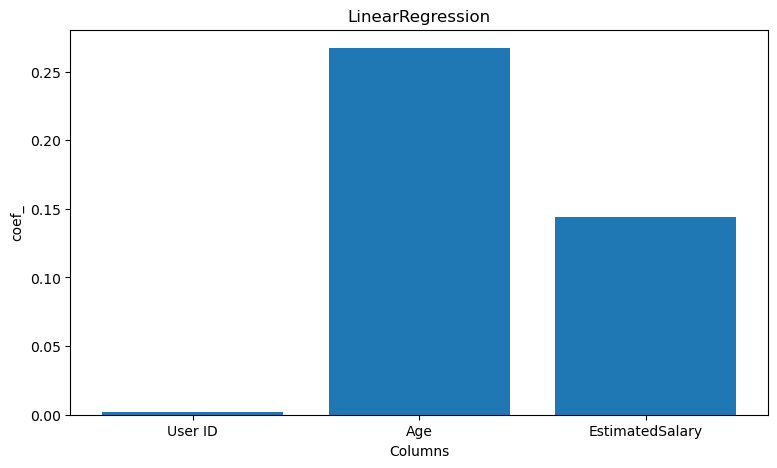

In [192]:
plt.figure(figsize=(9,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('Columns')
plt.ylabel('coef_')
plt.show()

In [245]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [255]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.26563126891651107
0.09942920494421377
0.3153239682361837



# Lasso


In [229]:
la=Lasso(alpha=7)
la.fit(x_train,y_train)


Lasso(alpha=7)

In [231]:
la.score(x_test,y_test)*100

-0.03863324175823468

In [257]:
print(mean_absolute_error(y_test,la.predict(x_test)))
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

0.4578125
0.227587890625
0.47706172622104154


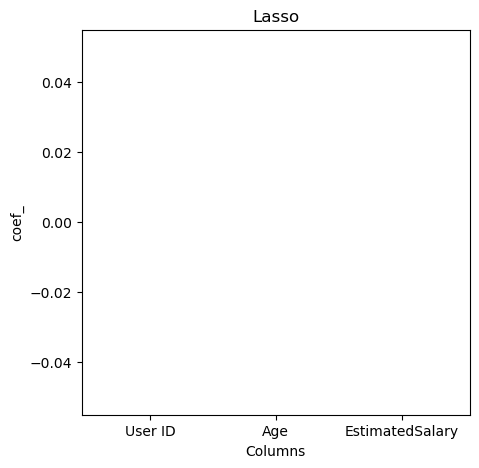

In [233]:
plt.figure(figsize=(5,5))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('coef_')
plt.show()


#Rigid


In [239]:
ri=Ridge(alpha=0.5)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

56.28643879390687

In [259]:
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(mean_squared_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

0.265621932751322
0.0994483517438619
0.3153543272952853


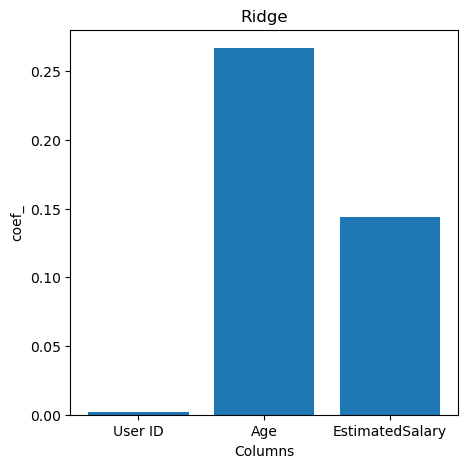

In [261]:
plt.figure(figsize=(5,5))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coef_')
plt.show()

In [265]:
df=pd.DataFrame({'column_name': x.columns,'LinearRegression':lr.coef_,'Lasso':la.coef_,'ridge':ri.coef_})
df

,column_name,LinearRegression,Lasso,ridge
0,User ID,0.001648,0.0,0.001677
1,Age,0.267133,0.0,0.266716
2,EstimatedSalary,0.143930,0.0,0.143765


In [ ]:
classifiaction-->Logistic Regression



In [ ]:
# singal input an output   Binary Classification:

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [362]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


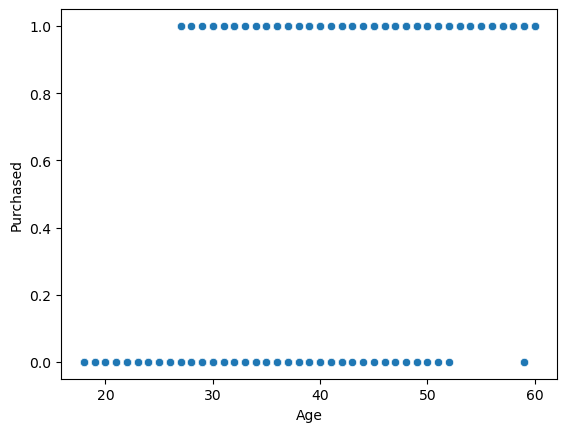

In [365]:
sns.scatterplot(x = 'Age',y = 'Purchased',data=data)
plt.show()

In [367]:
x=data[['Age']]
y=data['Purchased']

In [369]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [371]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [373]:
lr.score(x_test,y_test)*100

91.25

In [375]:
lr.predict([[19]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

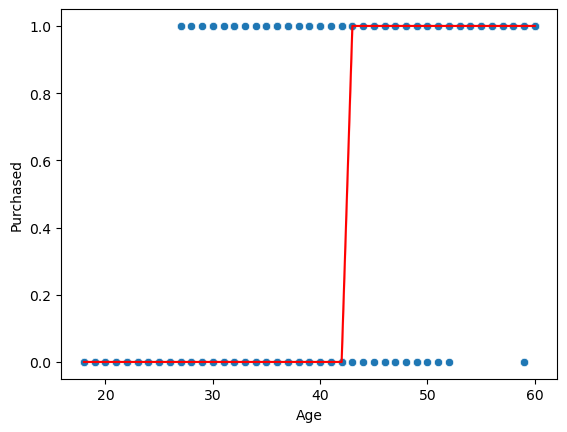

In [380]:
sns.scatterplot(x = 'Age',y = 'Purchased',data=data)
sns.lineplot(x = 'Age',y =lr.predict(x),data=data,c='red')
plt.show()

What is Classification in Machine Learning?
Classification is a type of supervised learning task in machine learning where the goal is to predict the category or class of a given input based on training data. The output in classification problems is discrete or categorical (e.g., binary like yes/no, or multi-class like animal types).

Examples of Classification:
Spam Detection: Classify emails as spam or not spam.
Disease Diagnosis: Predict whether a patient has a disease or not (binary classification).
Image Classification: Identify objects in an image (e.g., cat, dog, car – multi-class classification).
Sentiment Analysis: Classify customer reviews as positive or negative.
How Classification Works:
Training Phase:
The model learns a relationship between the input features (e.g., age, income) and the output labels (e.g., “will purchase” or “won’t purchase”) using a labeled dataset.
Prediction Phase:
When given new, unseen data, the trained model predicts the most likely class for that input.
Types of Classification:
Binary Classification:
There are two classes.
Example: Spam vs. Not Spam.
Multi-Class Classification:
There are more than two classes.
Example: Classifying animals as Cat, Dog, or Bird.
Multi-Label Classification:
One input can belong to multiple classes simultaneously.
Example: A movie can belong to genres like Action and Comedy.


What is Logistic Regression?
Logistic Regression is a supervised learning algorithm used for classification tasks. Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that map to discrete classes (like 0 or 1) using the sigmoid function.

When is Logistic Regression Used?
It is typically used for binary classification problems, where the outcome is one of two classes (e.g., spam or not spam). However, it can also be extended to multi-class classification (via softmax or one-vs-rest approaches).



In [ ]:

#2> multinomial regression


In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [438]:

data.drop(columns=['Gender'],inplace=True)

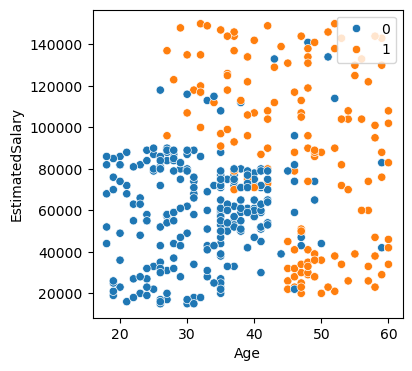

In [440]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')
plt.legend(loc=1)
plt.show()

In [442]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [444]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [446]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [448]:
lr.score(x_test,y_test)*100

88.75

In [2]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions=(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (284379728.py, line 2)

In [ ]:

#polynomial features using logistic  regression 



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:

data.drop(columns=['Gender'],inplace=True)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

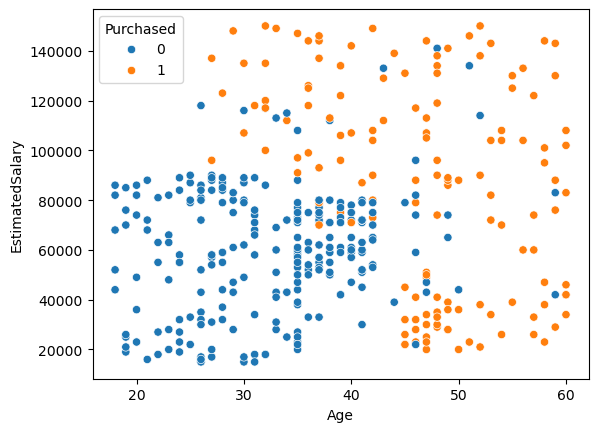

In [14]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary',data=data,hue='Purchased')

In [16]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pf=PolynomialFeatures(degree=2)
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
lr.score(x_test,y_test)*100

82.5

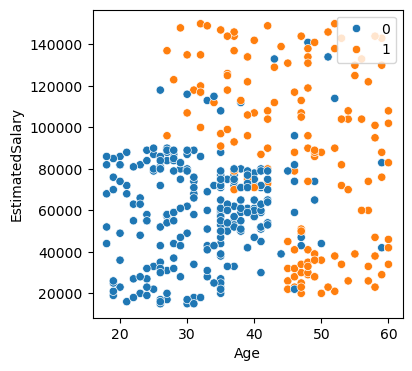

In [48]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')
plt.legend(loc=1)
plt.show()

In [ ]:

#multi_class classification in lodistic regression
#it will  using the ovr method or soft class  classification 


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [108]:

data.drop(columns=['Gender'],inplace=True)

<Figure size 300x300 with 0 Axes>

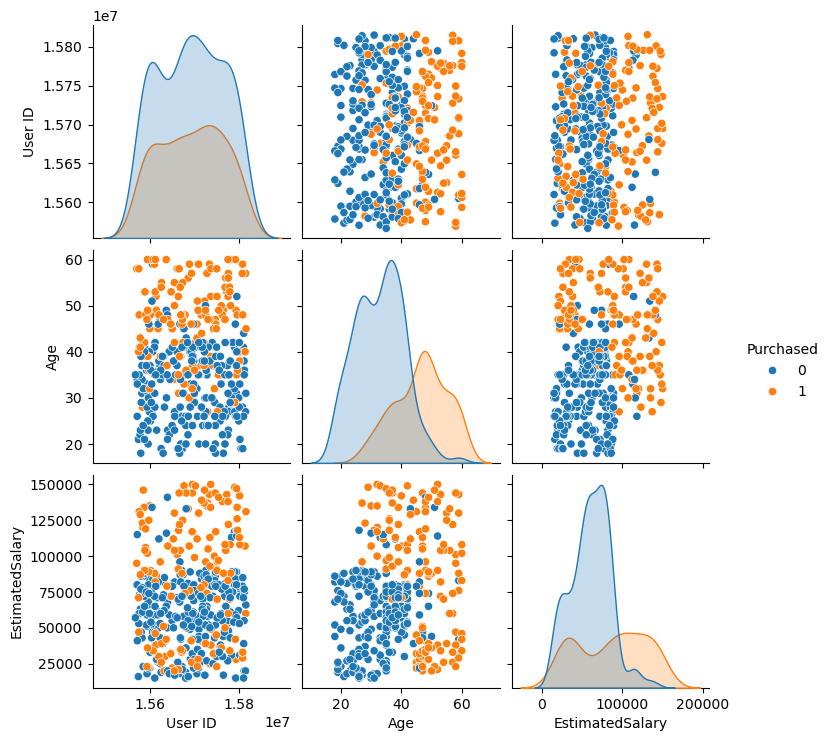

In [116]:
plt.figure(figsize=(3,3))
sns.pairplot(data=data,hue='Purchased')
plt.show()

In [125]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

ovr

In [130]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [132]:
lr.score(x_test,y_test)*100

88.75

MULTINOMIAL

In [139]:
lr=LogisticRegression(multi_class='multinomial')
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [141]:
lr.score(x_test,y_test)*100

88.75

In [ ]:
# confusion matrix 
#confusion_matrix, precision_score, f1_score

In [143]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [145]:

data.drop(columns=['Gender'],inplace=True)

In [153]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [157]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [159]:
lr.score(x_test,y_test)*100

88.75

In [165]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

In [177]:
cf=confusion_matrix(y_test,lr.predict(x_test))

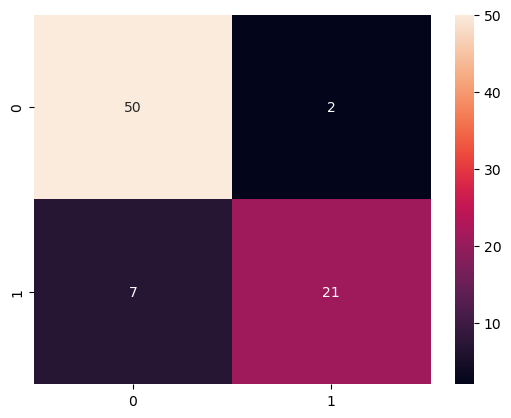

In [179]:
sns.heatmap(cf,annot=True)
plt.show()

In [187]:
pc=precision_score(y_test,lr.predict(x_test))*100

In [183]:
f1_score(y_test,lr.predict(x_test))*100

82.35294117647058

1. Confusion Matrix
The confusion matrix is a performance measurement tool for classification problems. It summarizes the prediction results by showing the counts of:

True Positive (TP): Model correctly predicted positive class.
True Negative (TN): Model correctly predicted negative class.
False Positive (FP): Model incorrectly predicted positive when it’s actually negative (Type I error).
False Negative (FN): Model incorrectly predicted negative when it’s actually positive (Type II error).

2. Precision Score
Precision measures the percentage of correct positive predictions out of all the instances predicted as positive. It is useful when false positives are costly (e.g., predicting someone has a disease).

Precision= TP+tp/fp

3. F1 Score
The F1 Score is the harmonic mean of Precision and Recall. It provides a balanced measure when there is an uneven class distribution or when both false positives and false negatives are important.                                                      

f1 score=2*precesion*recall/precesion+recall

                                                      

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


imbalanced data to used this to clases to balances the data
--random under sampling,
random over sampling

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [54]:
data.drop(columns=['Gender'],inplace=True)

In [56]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [58]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
ru=RandomUnderSampler()
ry_x,ru_y=ru.fit_resample(x,y)

In [64]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [69]:
lr.score(x_test,y_test)*100

88.75

In [80]:
prediction = lr.predict([[15810944,35, 20000]])
prediction

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

random under samling same as over sampling change the class

a) Oversampling the Minority Class

What: Increase the number of samples in the minority class by replicating or generating synthetic samples.
How:
Random Oversampling: Randomly duplicate minority class samples.
SMOTE (Synthetic Minority Oversampling Technique): Generate new synthetic samples by interpolating between existing minority samples.
b) Undersampling the Majority Class

What: Reduce the number of samples in the majority class by randomly removing some of them.
How:
Random Undersampling: Randomly delete majority samples.
Tomek Links / Edited Nearest Neighbors: Remove samples from the majority class that are close to the minority samples.


NAIVE BAYES

naive bayes 3 types  
gaussasian (normal distribution)
bernauli destribution  (binary values prediction)
multinomial (discrite data,text values)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [101]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [103]:
data.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

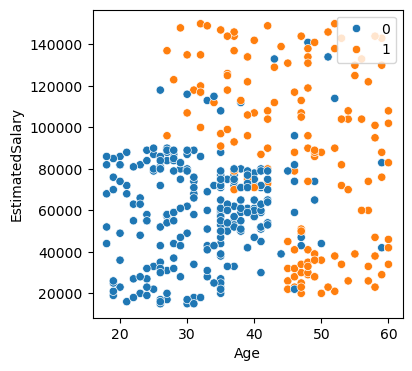

In [105]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')
plt.legend(loc=1)
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

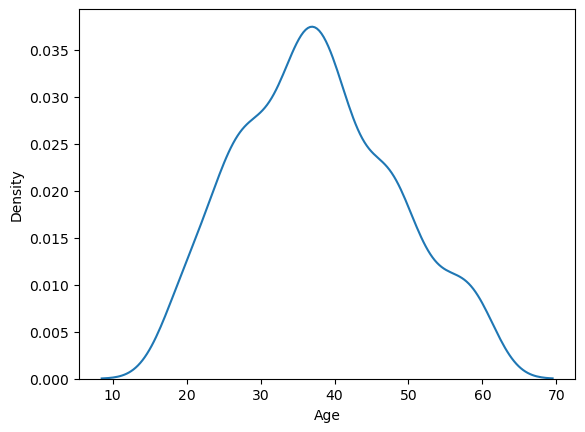

In [109]:
sns.kdeplot(data=data['Age'])
plt.show()

In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [113]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [117]:
gnb.score(x_test,y_test)*100

92.5

In [119]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [121]:
mnb.score(x_test,y_test)*100

63.74999999999999

In [123]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [125]:
bnb.score(x_test,y_test)*100

65.0

ValueError: Filler values must be provided when X has more than 2 training features.

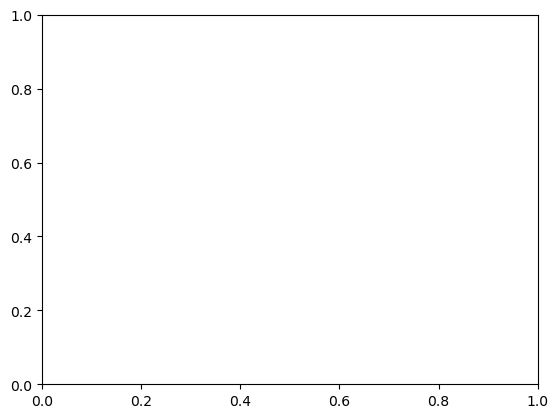

In [129]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()